<a href="https://colab.research.google.com/github/FabriceBeaumont/MachineLearning/blob/main/LinearProgramExercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install --upgrade --user ortools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Import linear solver from Google OR-Tools 
from ortools.linear_solver import pywraplp

In [7]:
def present_solver_solution(solver):
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL: 
        print('Solution:')
        print('Objective value =', round(solver.Objective().Value(), 2))
        print('x =', round(x.solution_value(), 2))
        print('y =', round(y.solution_value(), 2))
    else: 
        print('The problem does not have an optimal solution.')

    return status

# LP Examples

## Simple maximization LP (2.1.1)

Situation: Paula works at the uni (U, 50 EUR/h) and as a tutor (T, 30 EUR/h). 

For U: Teaching material 10 pages, driving 20 km, preparation time 3 h.

For T: Teaching material 20 pages, driving 10 km, preparation time 1 h.

Limits: 160 pages, 110 km, 15 h.

Target function: Maximize income.

In [12]:
# Instantiate a Glop solver.
solver = pywraplp.Solver.CreateSolver('GLOP')
# Create the two non-negative variables.
x = solver.NumVar(0, solver.infinity(), 'h_uni ') 
y = solver.NumVar(0, solver.infinity(), 'h_tutor')
# Page restriction.
solver.Add(10 * x + 20 * y <= 160)
# Driving restriction.
solver.Add(20 * x + 10 * y <= 110)
# Preparation time restriction.
solver.Add( 3 * x + 1 * y <= 15)
# Set as maximization problem and input target function.
solver.Maximize(50 * x + 30 * y)

In [13]:
status = present_solver_solution(solver)

Solution:
Objective value = 310.0
x = 2.0
y = 7.0


### Plot the solution

LP: 

$\begin{align}
\max 50x +30y \\
\text{s.t.} 10 x +20 y &\le 160\\
20 x +10 y &\le 110 \\
3 x + 1y &\le 15\\ 
x &≥ 0 \\ 
y &≥ 0
\end{align}$

Text(0, 0.5, '$y$')

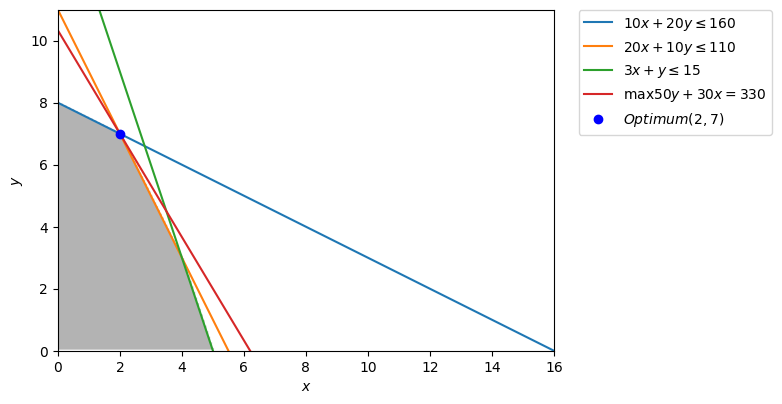

In [30]:
# Plot the feasible region.
d = np.linspace(-2,16,300)
x,y = np.meshgrid(d,d)

# Plot the feasible region.
plt.imshow( ((y>=0) & (20*y<=160-10*x) & (10*y<=110-20*x) & (y<=15-3*x)).astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),
            origin="lower", 
            cmap="Greys", 
            alpha = 0.3);


# Plot the lines defining the constraints.
x = np.linspace(0, 16, 2000)
# 10x + 20y <= 160
y1 = (16-x)/2
# 20x + 10y <= 110
y2 = (11-2*x)
# 3x + y <= 15
y3 = 15-3*x

# Plot the lines defining the target function - with optimal values.
# 50x + 30y = b such that for x = 2.0 and y = 7.0 b = 310.0
f = -5/3 * x + 31/3

# Make plot
plt.plot(x, y1, label=r'$10x + 20y \leq 160$')
plt.plot(x, y2, label=r'$20x + 10y \leq 110$')
plt.plot(x, y3, label=r'$3x + y \leq 15$')
 
plt.plot(x, f, label=r'$\max 50 y + 30x = 330 $')
plt.plot(2, 7, 'bo', label=r'$Optimum (2,7)$')

plt.xlim(0, 16)
plt.ylim(0, 11)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')